In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from openpyxl import load_workbook
from matplotlib.gridspec import GridSpec
import os
from matplotlib.lines import Line2D

In [2]:
p = pd.read_csv('cooccur_plasmids')
integ = pd.read_csv('cooccur_integrons')
trans = pd.read_csv('cooccur_transposons')
vfdb = pd.read_csv('cooccur_vfdb')
res = pd.read_csv('cooccur_resfinder')

In [3]:
#res.head()
#p.head()
#vfdb.head()
#integ.head()
trans.head()

,toxins,transposons,Count_transposons
0,1H-CbtA_toxin,[],0
1,2H-Cpta_toxin,"['Tn5393', 'Tn1721', 'Tn1000', 'Tn6196', 'Tn60...",27
2,3H-Polyketide_cyc2,"['Tn5393', 'Tn1721', 'Tn1000', 'Tn6196', 'Tn60...",27
3,4H-Fic,"['Tn5393', 'Tn1721', 'Tn1000', 'Tn6196', 'Tn60...",27
4,5H-GNAT_acetyltran,"['Tn5393', 'Tn1721', 'Tn1000', 'Tn6196', 'Tn60...",27


In [4]:
res.columns

Index(['toxins', 'amr genes', 'aminoglycoside_resistance',
       'betalactam_resistance', 'refampicin_resistance', 'phenicol_resistance',
       'trimethoprim_resistance', 'fosfomycin_resistance',
       'macrolide_resistance', 'colistin_resistance', 'quinolone_resistance',
       'sulphonamide_resistance', 'tetracycline_resistance',
       'Count_aminoglycoside_resistance', 'Count_betalactam_resistance',
       'Count_refampicin_resistance', 'Count_phenicol_resistance',
       'Count_trimethoprim_resistance', 'Count_fosfomycin_resistance',
       'Count_macrolide_resistance', 'Count_colistin_resistance',
       'Count_quinolone_resistance', 'Count_sulphonamide_resistance',
       'Count_tetracycline_resistance', 'Count_total_amr_genes'],
      dtype='object')

In [5]:
res = res[['toxins', 'Count_total_amr_genes']]
p = p[['toxins', 'Count_plasmids']]
vfdb = vfdb[['toxins', 'Count_virulence_genes']]
integ = integ[['toxins', 'Count_integrons']]
trans = trans[['toxins', 'Count_transposons']]

In [6]:
temp= res.merge(p,on='toxins', how = 'left')
temp1 = temp.merge(vfdb,on='toxins', how = 'left')
temp2 = temp1.merge(integ,on='toxins', how = 'left')
temp3 = temp2.merge(trans,on='toxins', how = 'left')

In [7]:
final_df = temp3.copy()

In [8]:
temp3['Count_transposons'].value_counts()

0     143
1      10
27      5
24      3
20      2
2       2
23      1
18      1
9       1
5       1
Name: Count_transposons, dtype: int64

In [9]:
#filtered_df1.shape

In [10]:
#filtered_df2.shape

In [11]:
threshold = 1
# Filter out rows with Count_total_amr_genes below threshold
filtered_df1 = final_df[final_df['Count_virulence_genes'] >= threshold]
# Filter out rows with Count_total_amr_genes below threshold
filtered_df2 = final_df[final_df['Count_total_amr_genes'] >= threshold]

In [12]:
filtered_df1.min()

toxins                   10H-HipA_C-Couple_hipA
Count_total_amr_genes                         0
Count_plasmids                                0
Count_virulence_genes                         1
Count_integrons                               0
Count_transposons                             0
dtype: object

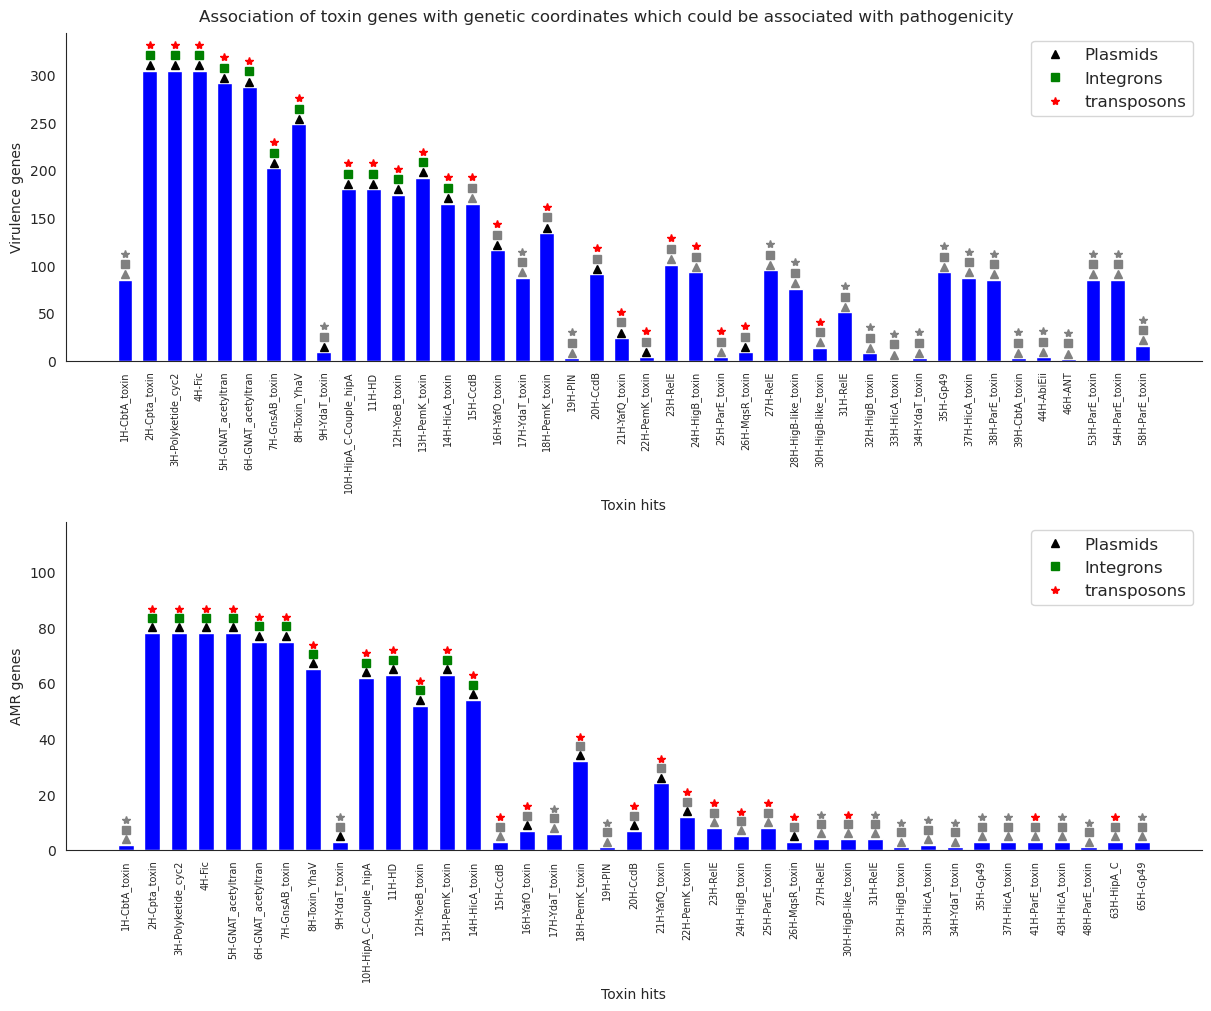

In [13]:
#combined barplots
fig = plt.figure(figsize=(12, 10), layout="constrained")
sns.set_style("white")

fig.suptitle('Association of toxin genes with genetic coordinates which could be associated with pathogenicity', fontsize=12)

#two rows and two columns
gs = GridSpec(nrows=2, ncols=1, figure=fig)
#define subplot 
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[1, 0])

# Set the width of each bar
width = 0.6

# Set the spacing between bars
spacing = 0.2


#second barplot
# Plot the filtered data
barplot1 = ax0.bar(filtered_df1['toxins'], filtered_df1['Count_virulence_genes'], align='center', width=width, color='blue')
for i, bar in enumerate(barplot1):
    if filtered_df1.iloc[i]['Count_plasmids'] > 0:
        ax0.plot(bar.get_x() + bar.get_width()/2, filtered_df1.iloc[i]['Count_virulence_genes'] + 5.8, '^', color='black')
    else:
        ax0.plot(bar.get_x() + bar.get_width()/2, filtered_df1.iloc[i]['Count_virulence_genes'] + 5.8, '^', color='grey')
        
    if filtered_df1.iloc[i]['Count_integrons'] > 0:
        marker_color = 'green'
        ax0.plot(bar.get_x() + bar.get_width()/2, filtered_df1.iloc[i]['Count_virulence_genes'] + 16.4, 's', color=marker_color)
    else:
        marker_color = 'grey'
        ax0.plot(bar.get_x() + bar.get_width()/2, filtered_df1.iloc[i]['Count_virulence_genes'] + 16.4, 's', color=marker_color)
    if filtered_df1.iloc[i]['Count_transposons'] > 0:
        marker_color = 'red'
        ax0.plot(bar.get_x() + bar.get_width()/2, filtered_df1.iloc[i]['Count_virulence_genes'] + 27.4, '*', color=marker_color)
    else:
        marker_color = 'grey'
        ax0.plot(bar.get_x() + bar.get_width()/2, filtered_df1.iloc[i]['Count_virulence_genes'] + 27.4, '*', color=marker_color)


#second barplot
# Plot the filtered data
barplot2 = ax1.bar(filtered_df2['toxins'], filtered_df2['Count_total_amr_genes'], align='center', width=width, color='blue')

for i, bar in enumerate(barplot2):
    if filtered_df2.iloc[i]['Count_plasmids'] > 0:
        ax1.plot(bar.get_x() + bar.get_width()/2, filtered_df2.iloc[i]['Count_total_amr_genes'] + 2.1, '^', color='black')
    else:
        ax1.plot(bar.get_x() + bar.get_width()/2, filtered_df2.iloc[i]['Count_total_amr_genes'] + 2.1, '^', color='grey')
        
    if filtered_df2.iloc[i]['Count_integrons'] > 0:
        marker_color = 'green'
        ax1.plot(bar.get_x() + bar.get_width()/2, filtered_df2.iloc[i]['Count_total_amr_genes'] + 5.4, 's', color=marker_color)
    else:
        marker_color = 'grey'
        ax1.plot(bar.get_x() + bar.get_width()/2, filtered_df2.iloc[i]['Count_total_amr_genes'] + 5.4, 's', color=marker_color)
    if filtered_df2.iloc[i]['Count_transposons'] > 0:
        marker_color = 'red'
        ax1.plot(bar.get_x() + bar.get_width()/2, filtered_df2.iloc[i]['Count_total_amr_genes'] + 8.8, '*', color=marker_color)
    else:
        marker_color = 'grey'
        ax1.plot(bar.get_x() + bar.get_width()/2, filtered_df2.iloc[i]['Count_total_amr_genes'] + 8.8, '*', color=marker_color)
        
dfs = [filtered_df1, filtered_df2]        
axes = [ax0,ax1]
# Set the positions of the x-ticks and labels
x_pos1 = np.arange(len(filtered_df1['toxins']))
ax0.set_xticks(x_pos1)
x_pos2 = np.arange(len(filtered_df2['toxins']))
ax1.set_xticks(x_pos2)
for ax,filtered_df in zip(axes, dfs):
    ax.set_xticklabels(filtered_df['toxins'], rotation=90, fontsize=7)
    #ax.set_xlim([x_pos[0] - spacing, x_pos[-1] + spacing])
    ax.set_xlabel('Toxin hits', fontsize = 10)
    ax.tick_params(axis='x',rotation=90, labelsize = 7)
    ax.tick_params(axis='y', labelsize = 10)
    
ax0.set_ylim([0, max(filtered_df['Count_virulence_genes']) + 40])
ax1.set_ylim([0, max(filtered_df['Count_total_amr_genes']) + 40])
 
#Add legend and labels
legend_elements = [    Line2D([0], [0], marker='^', color='black', label='Plasmids', linestyle='None'),
    Line2D([0], [0], marker='s', color='green', label='Integrons', linestyle='None'),
    Line2D([0], [0], marker='*', color='red', label='transposons', linestyle='None')                  
]

# Add the legend to the plot
for ax in axes:
    ax.legend(handles=legend_elements, loc='upper right', fontsize=12)



#set label
ax0.set_ylabel('Virulence genes', fontsize = 10)
ax1.set_ylabel('AMR genes', fontsize = 10)
#despine all axes
sns.despine()    

#save plots
#plt.savefig('/home/anuradha/Documents/anu/phd_project/TA-SYSTEMS/TA_systems_clean/set1/pictures/publication/ASSOCIATION_barplots.tiff', dpi=300)
plt.savefig('/home/anuradha/Documents/anu/phd_project/TA-SYSTEMS/TA_systems_clean/set1/Publication_material/pictures/main/Fig8.tiff', dpi=300)
#plt.savefig('/home/anuradha/Documents/anu/phd_project/TA-SYSTEMS/TA_systems_clean/set1/Publication_material/pictures/allimages/Fig7.jpg', dpi=300)
plt.show()
